Note this paper found an overall bias in T vs. A in introns: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC403801/

Populating the interactive namespace from numpy and matplotlib


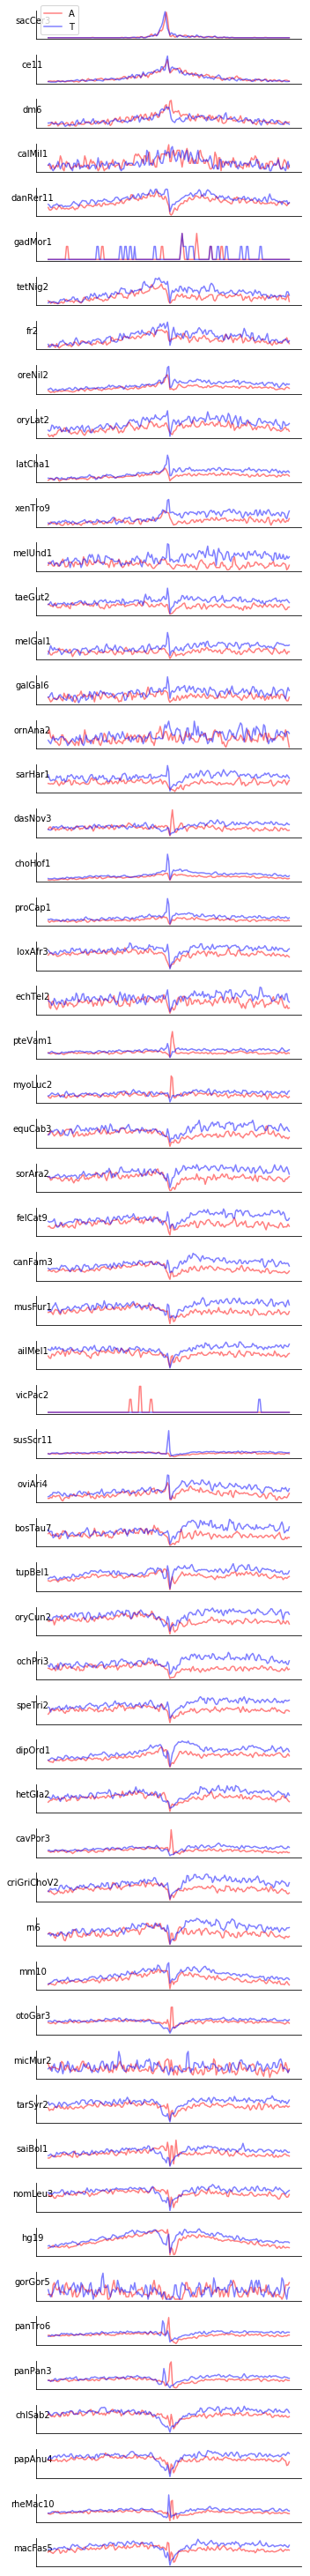

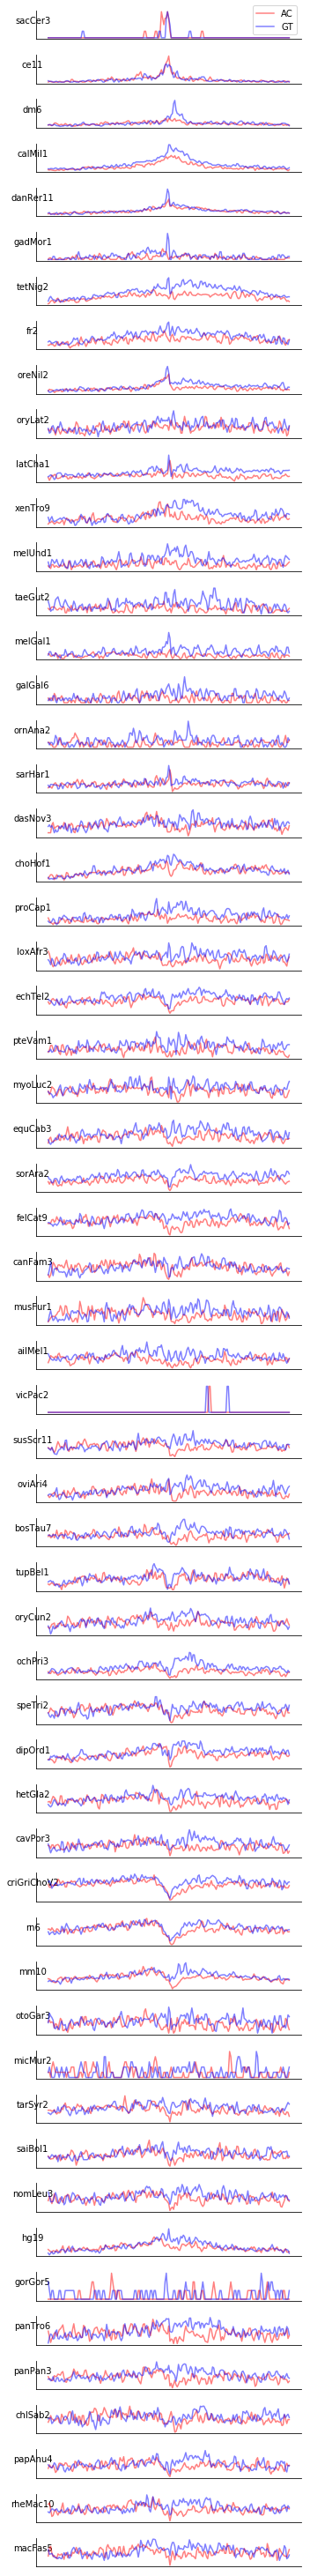

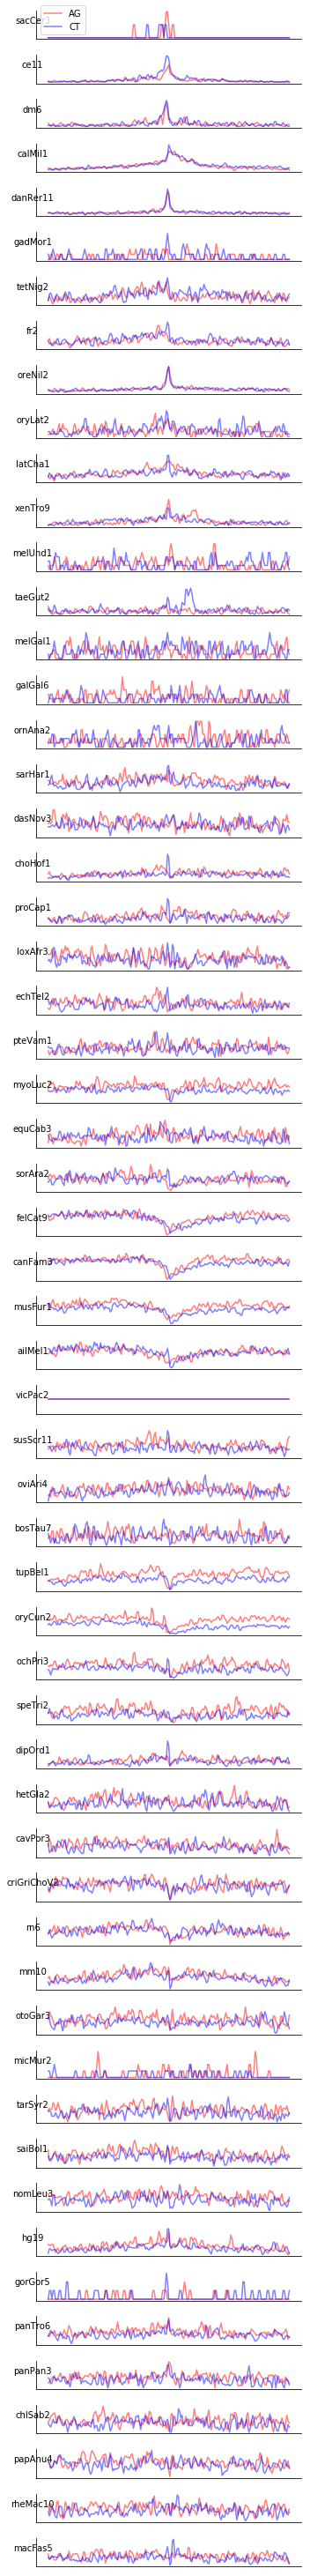

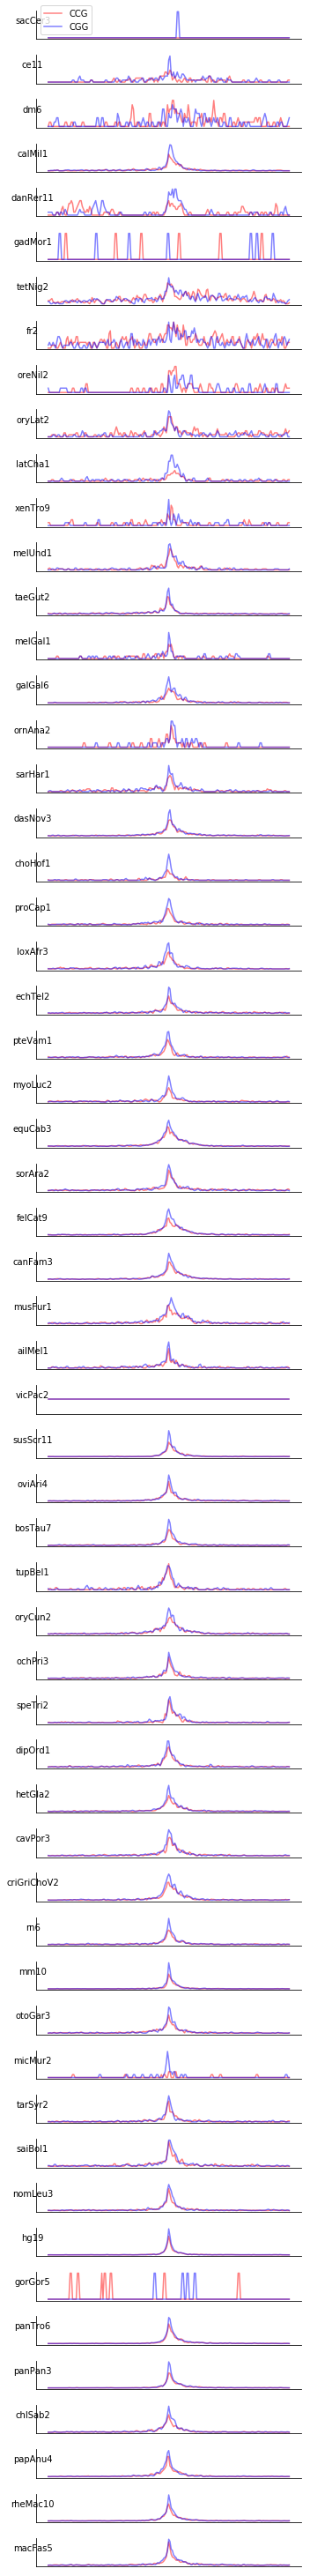

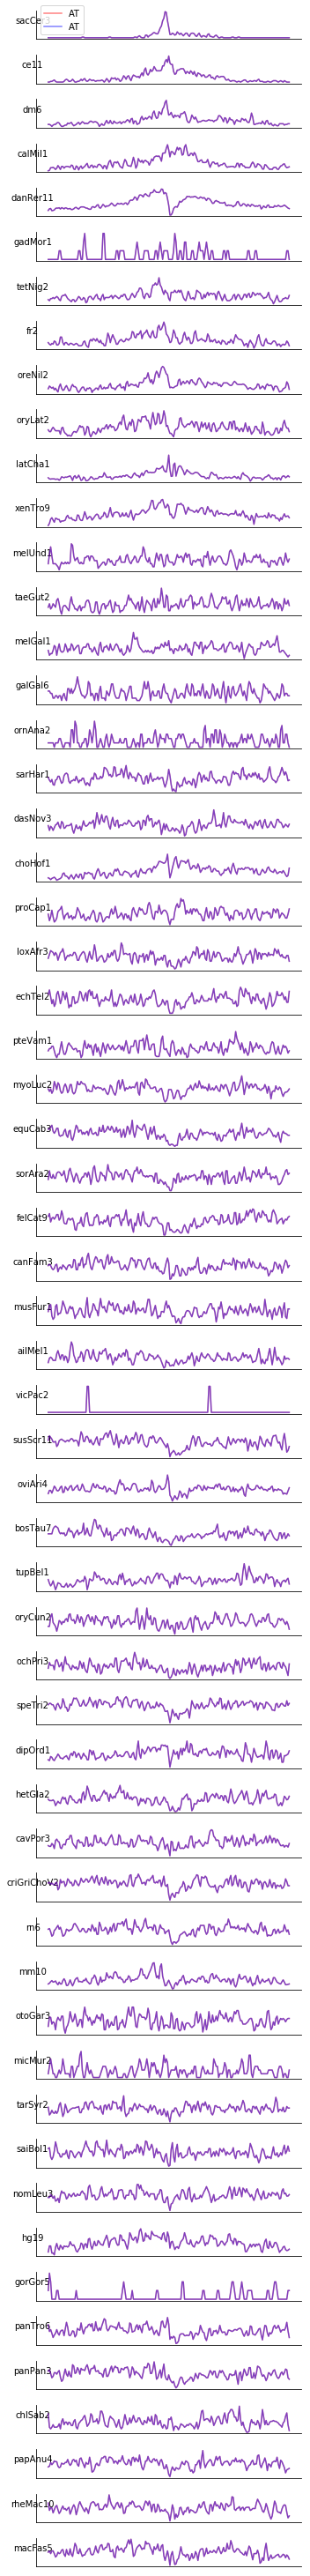

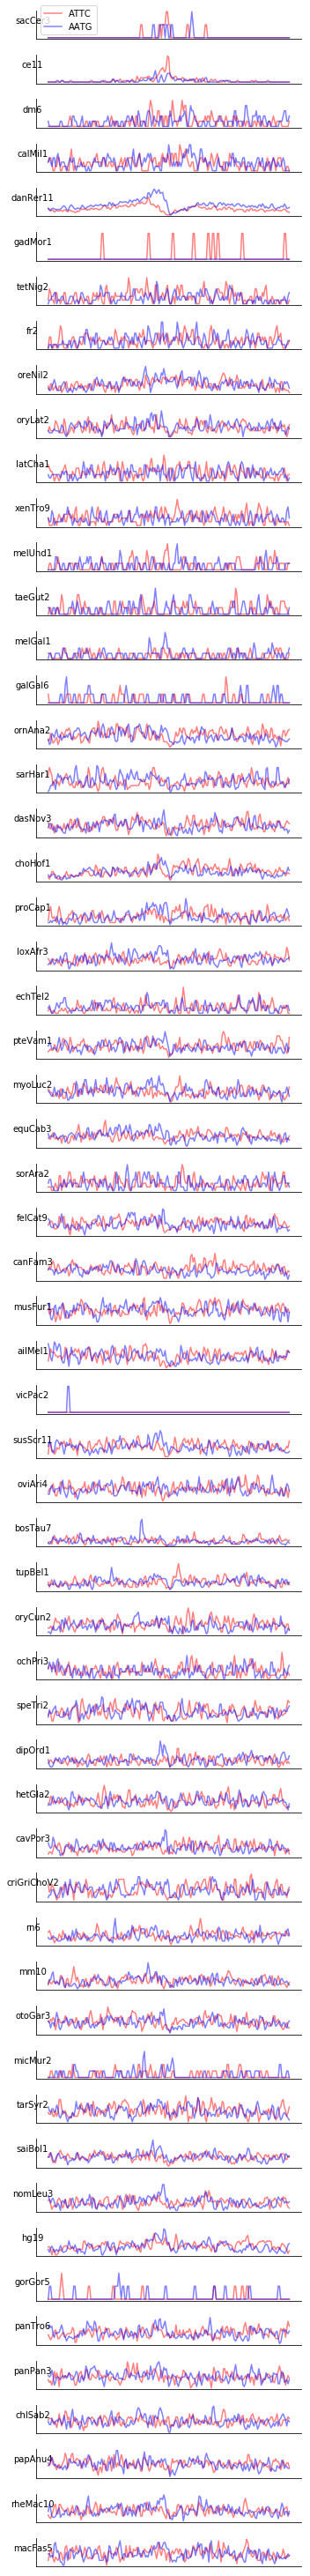

In [3]:
%pylab inline
import pandas as pd

#species_list = ["ailMel1","bosTau7","calMil1","canFam3","cavPor3","ce11","choHof1","criGriChoV2","danRer11","dasNov3",
#               "dipOrd1", "dm6", "echTel2","equCab3","felCat9",
#               "fr2", "gadMor1","galGal6","gorGor5","hetGla2","hg19",
#               "latCha1", "loxAfr3","macFas5","melGal1","melUnd1",
#               "micMur2","mm10"]
species_order = [item.strip() for item in open("species_order.txt").readlines()]
sorder = pd.DataFrame({"species": species_order, "order": range(len(species_order))})
#sorder = sorder[sorder["species"].isin(species_list)]
species_list = list(sorder["species"])

colors = ["red","blue"]
nrow = len(species_list)
plotshape = [nrow, 1] #[nrow,np.ceil(len(species_list)/nrow)]

motifsets = [("A","T"), ("AC","GT"), ("AG","CT"), ("CCG","CGG"), ("AT","AT"), ("ATTC","AATG")]

def MakePlot(motifsets, suffix="strwindows.bed"):
    for motifset in motifsets:
        plotind = 1
        fig = plt.figure()
        fig.set_size_inches((5*plotshape[1], 0.7*plotshape[0]))
        for species in species_list:
            try:
                data = pd.read_csv("%s.%s"%(species, suffix), sep="\t")
                data = data[data["bin"]<=4900]
            except:
                #plotind += 1
                continue
 
            ax = fig.add_subplot(plotshape[0], plotshape[1], plotind)
            ind = 0
            for motif in motifset:
                try:
                    ax.plot(data["bin"], data[motif], color=colors[ind], label=motif, alpha=0.5)
                except: continue
                ind += 1
            ax.set_ylabel(species, rotation=0)
            if plotind != len(species_list): ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')
            if plotind == 1: ax.legend()
            plotind += 1
        fig.tight_layout()
MakePlot(motifsets, suffix="strwindows.bed")

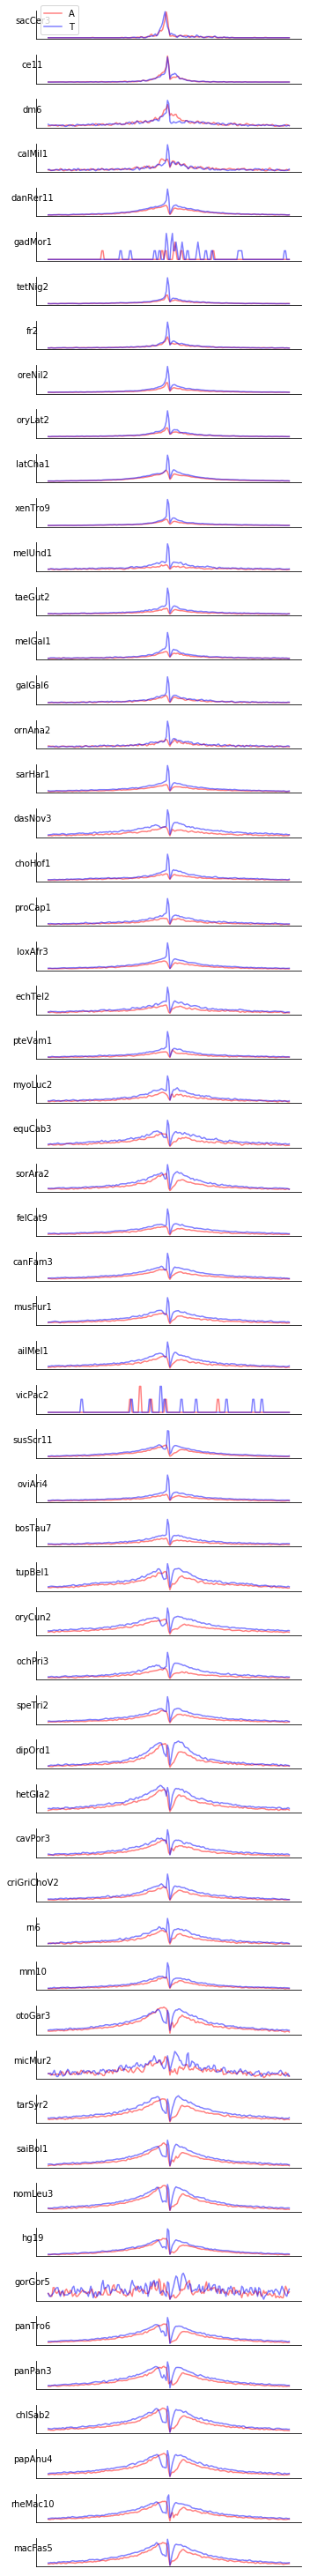

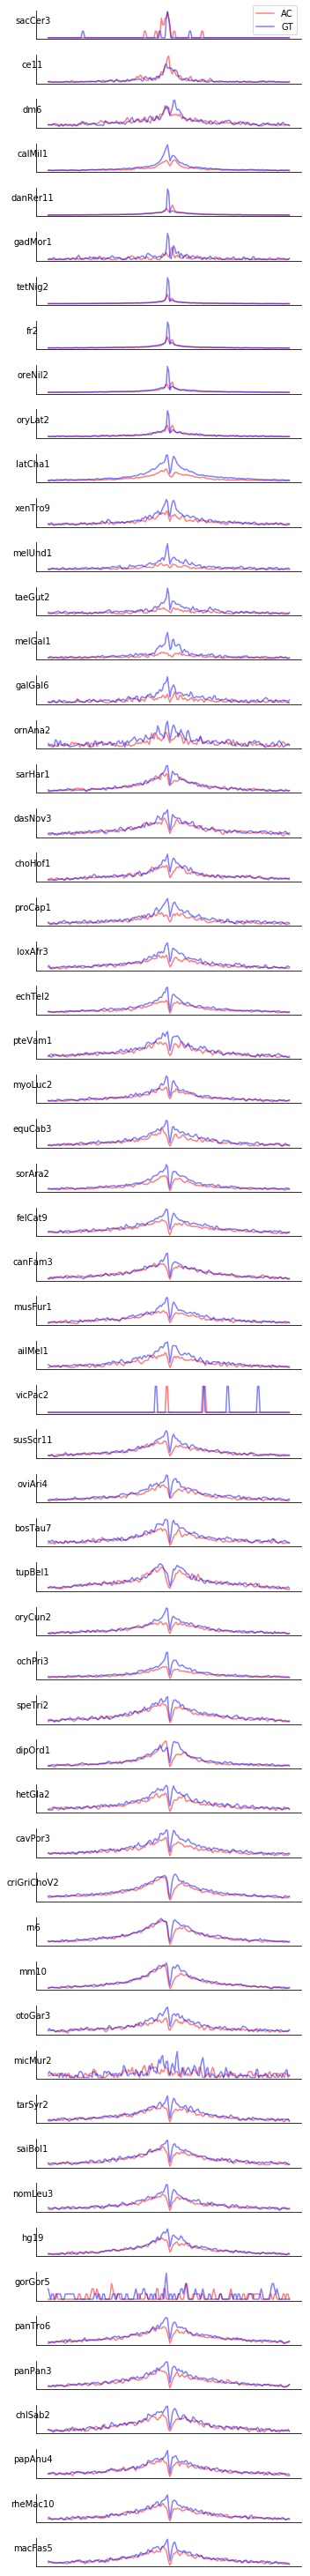

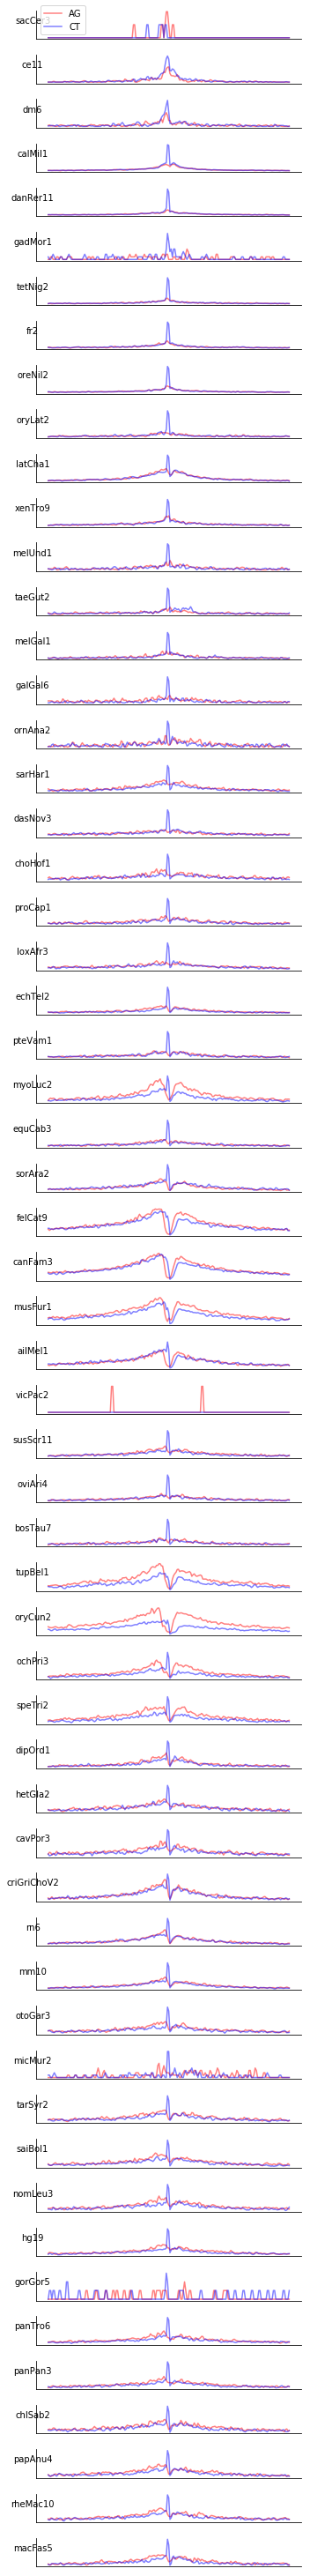

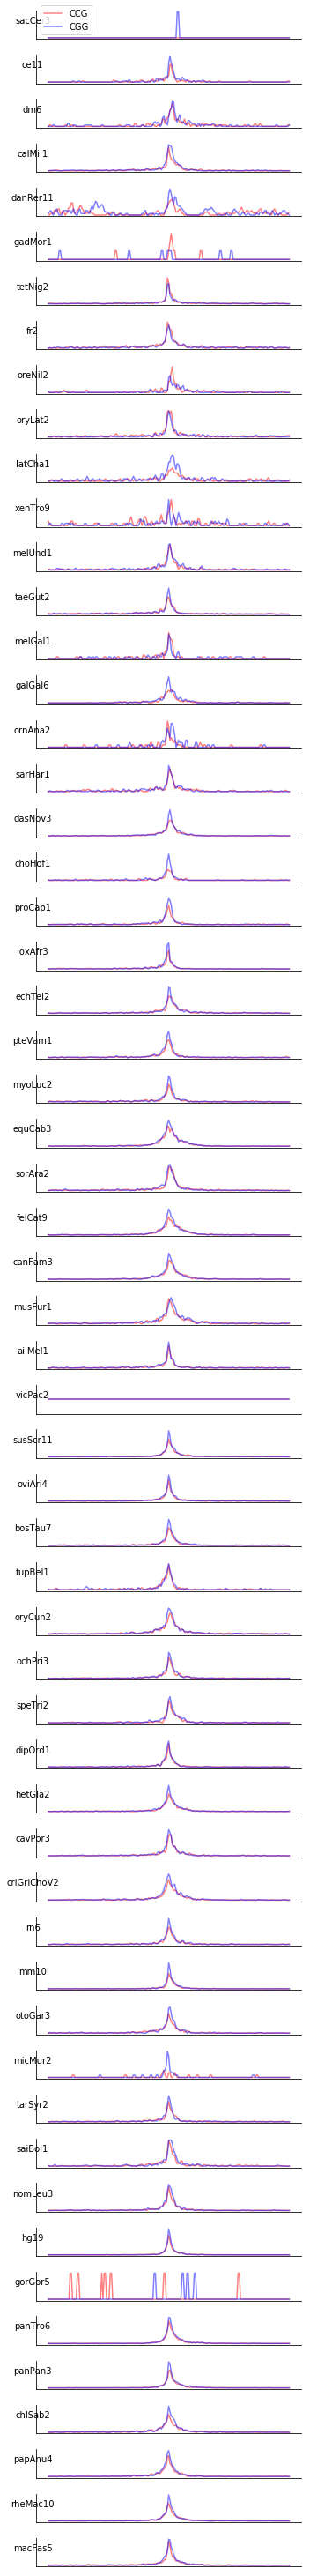

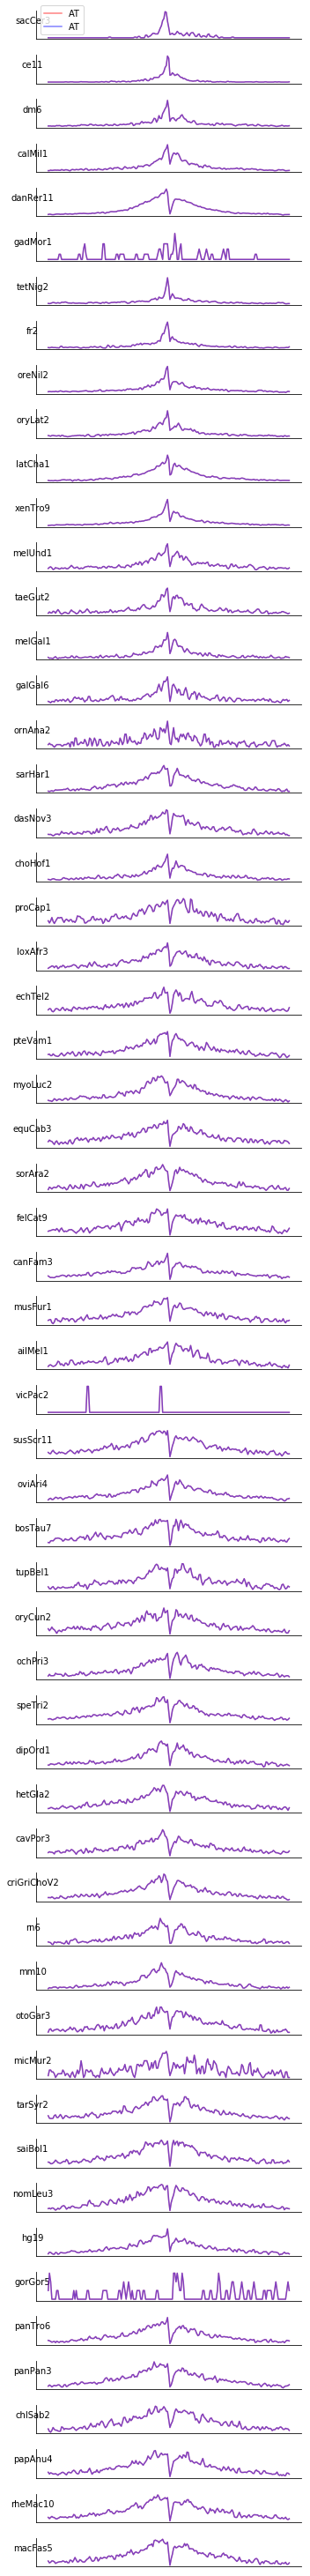

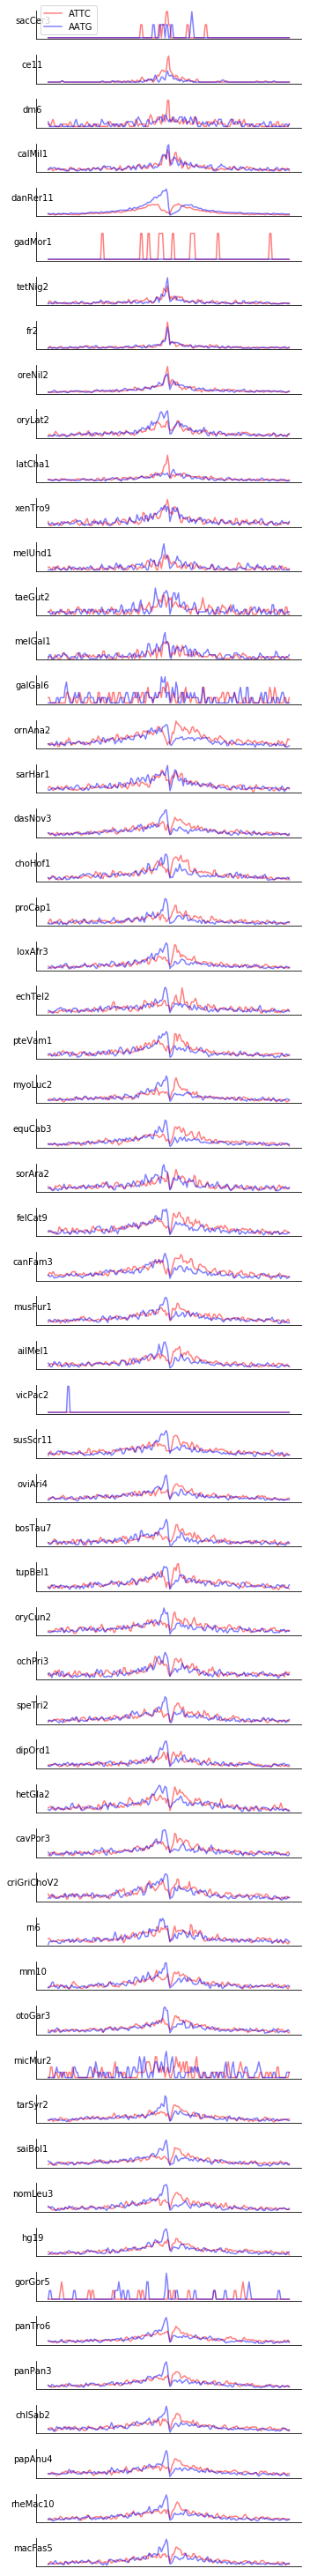

In [4]:
MakePlot(motifsets, suffix="acc.strwindows.bed")

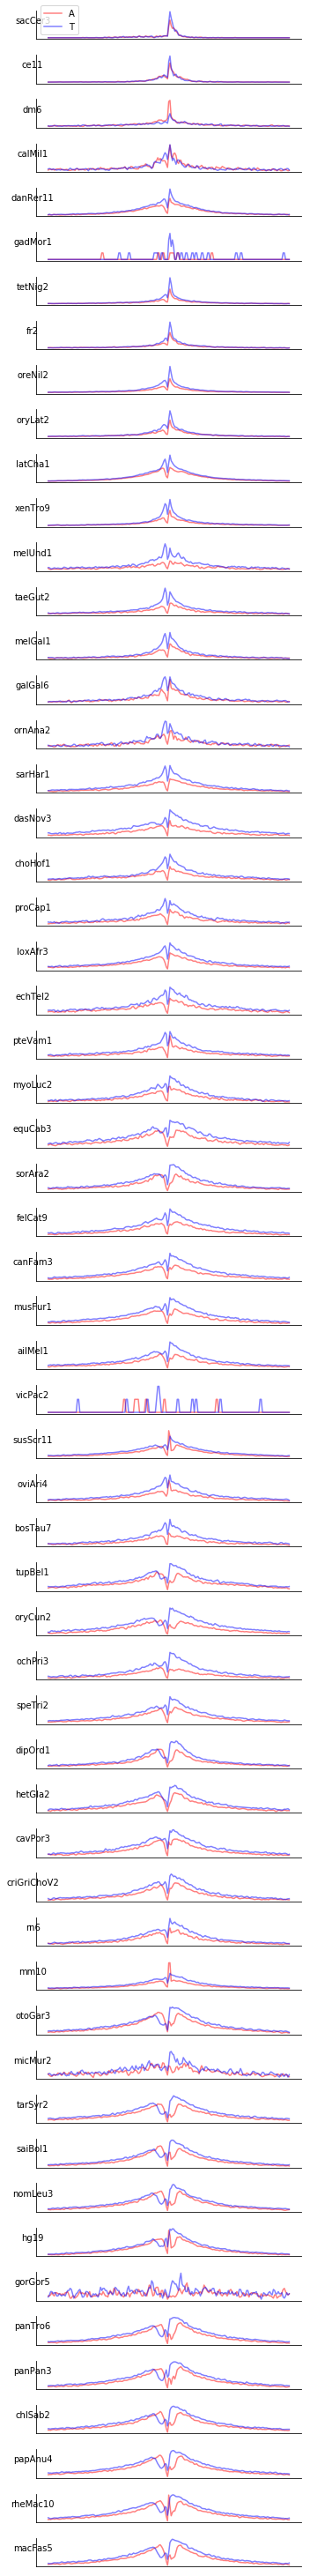

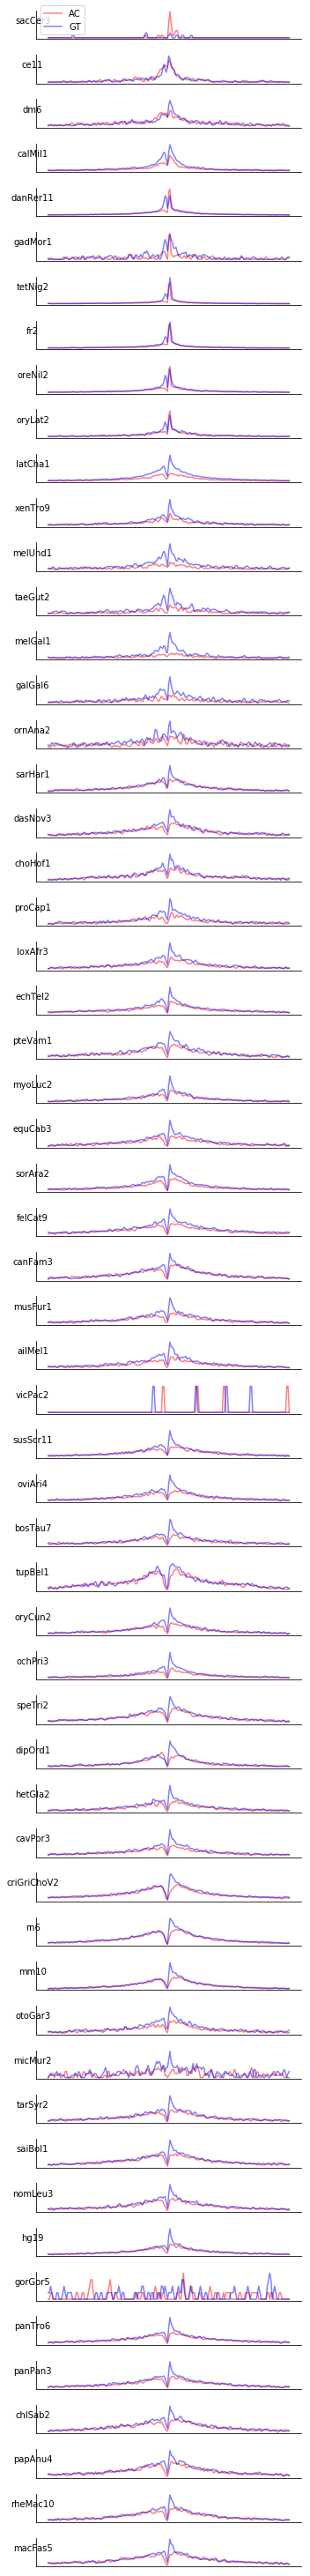

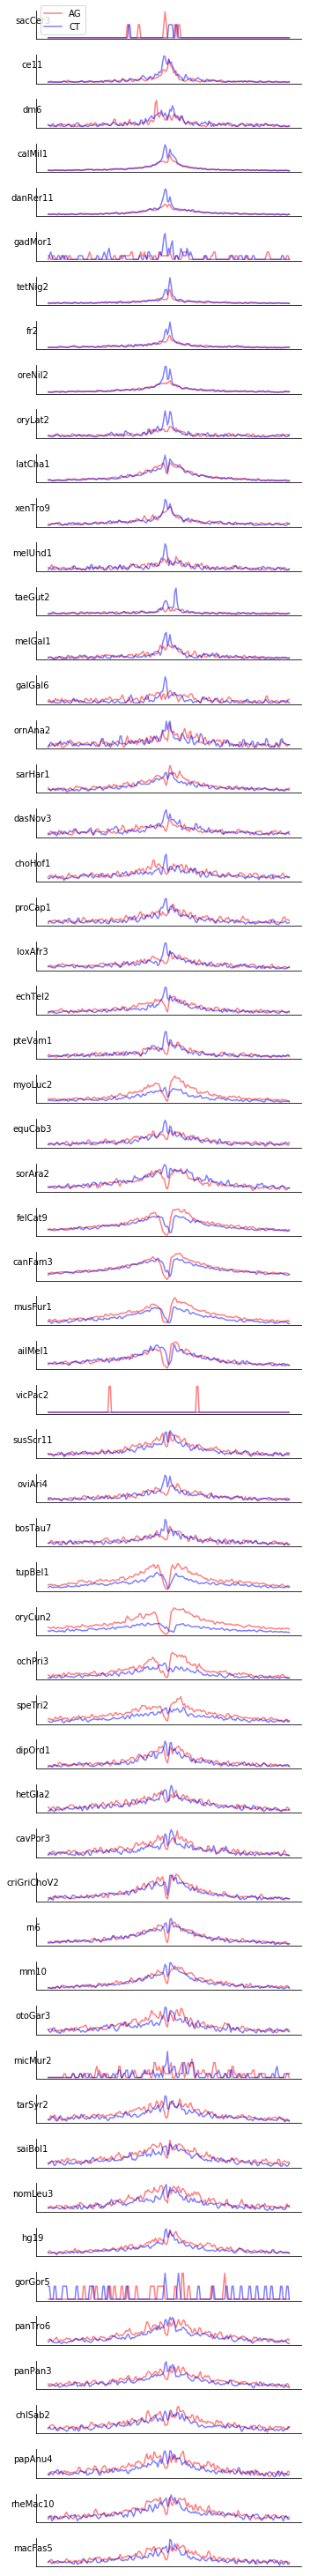

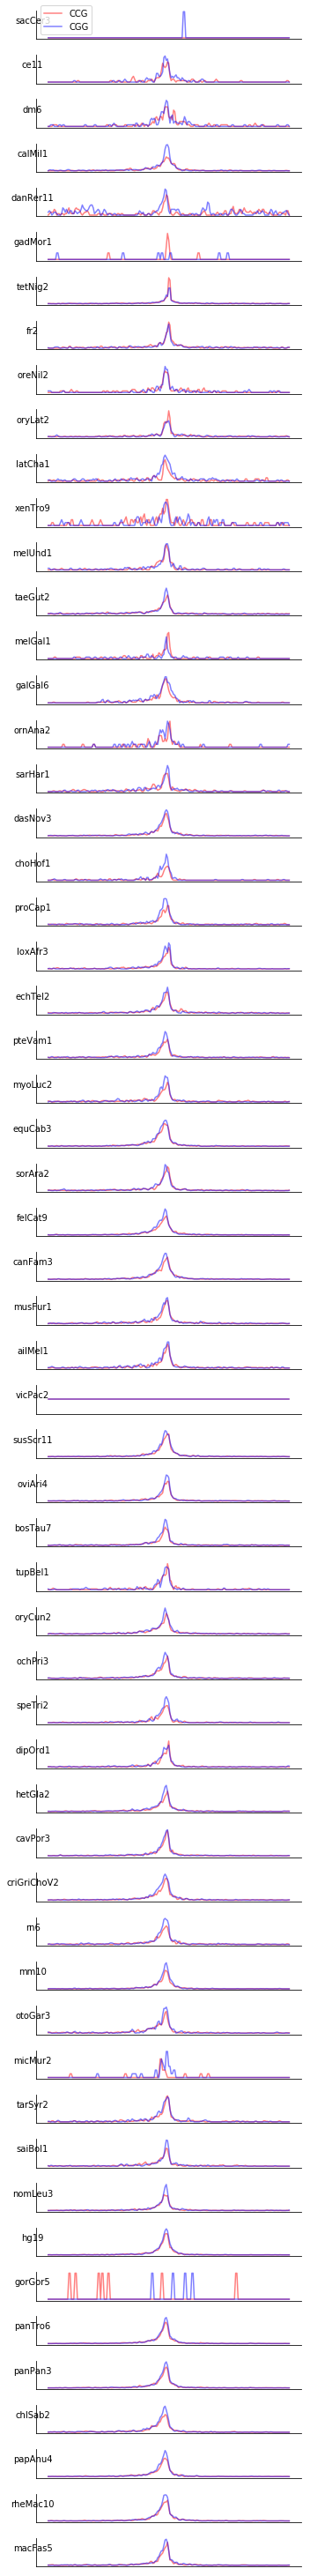

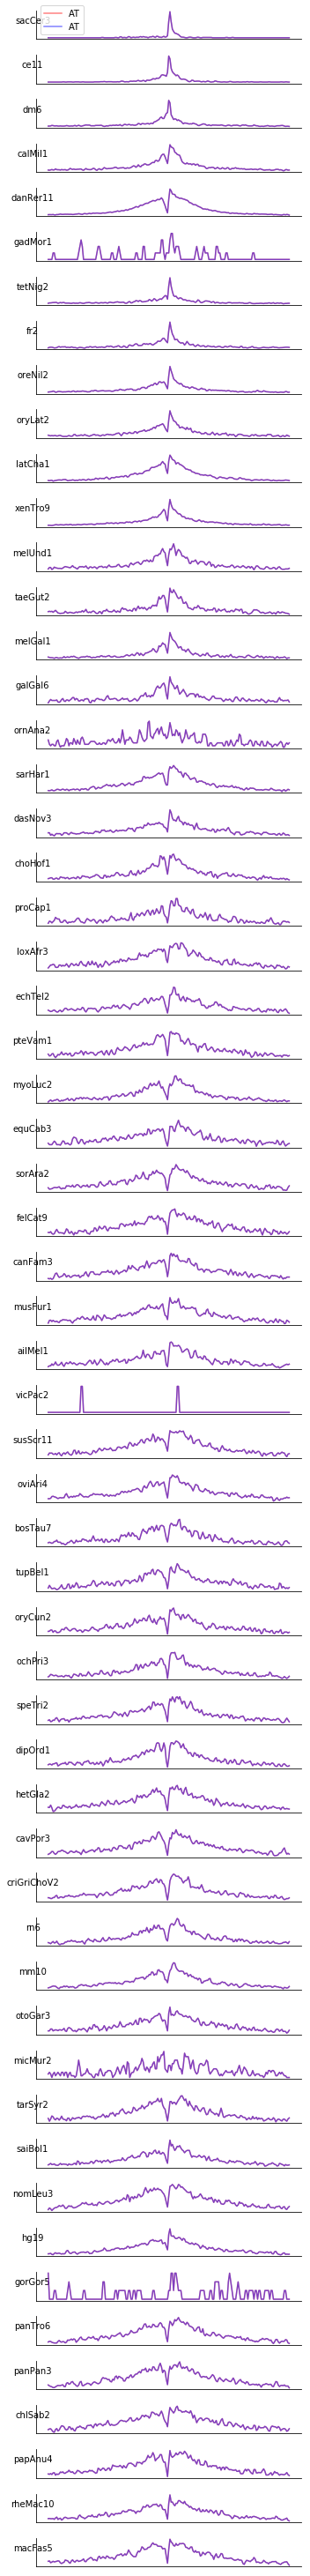

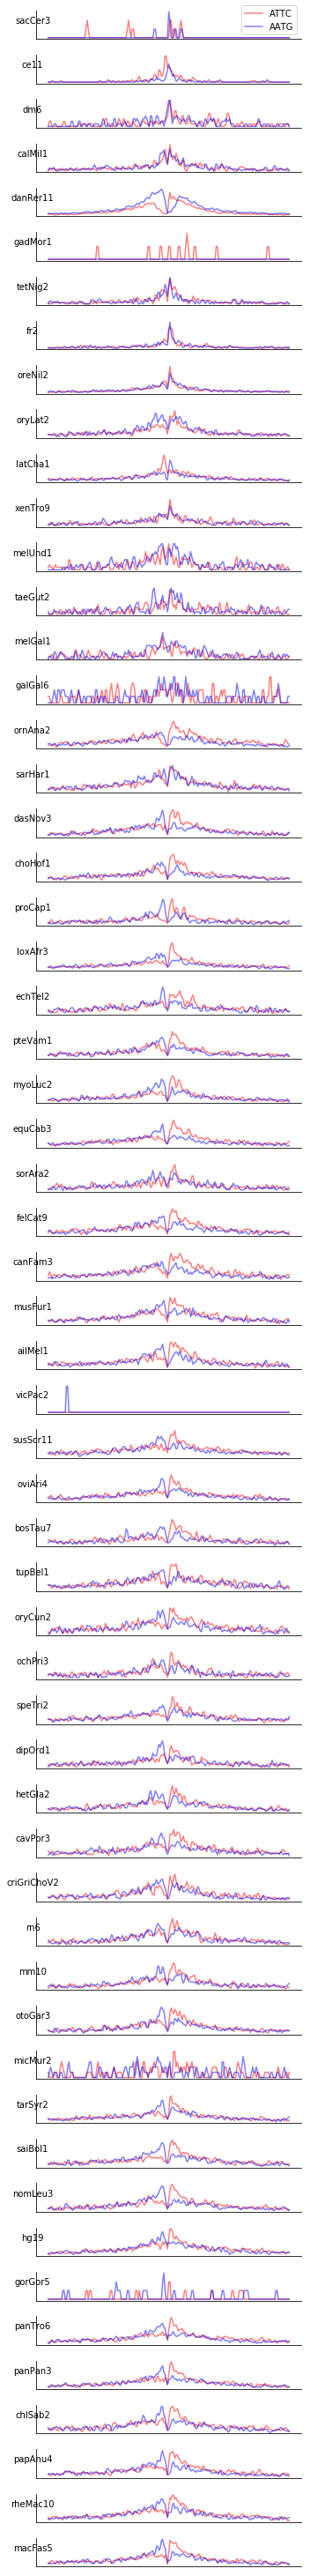

In [5]:
MakePlot(motifsets, suffix="donor.strwindows.bed")

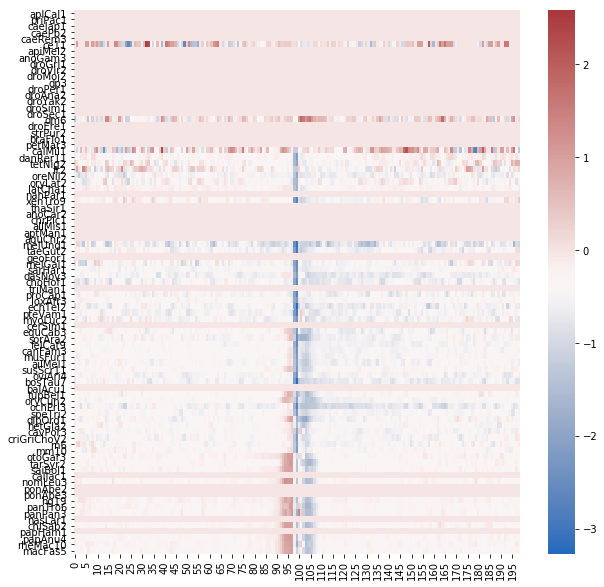

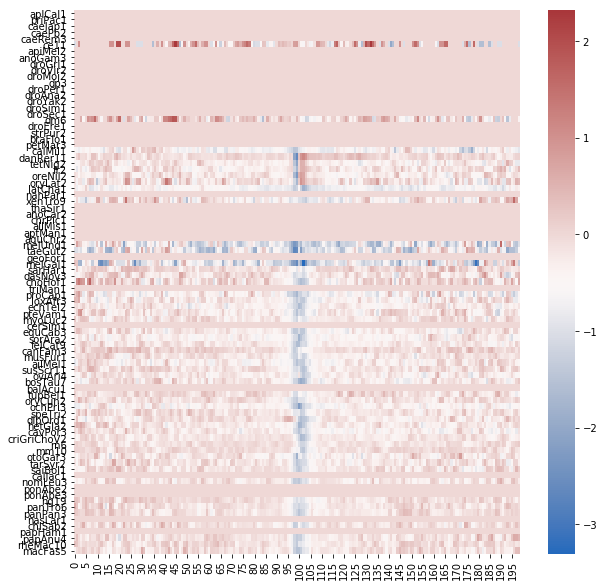

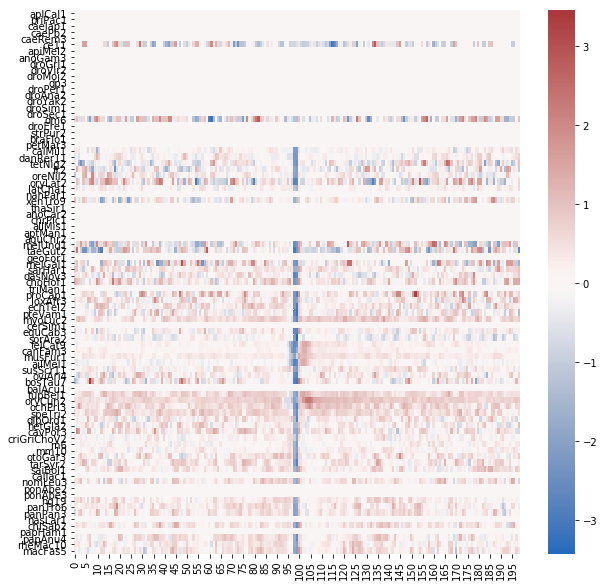

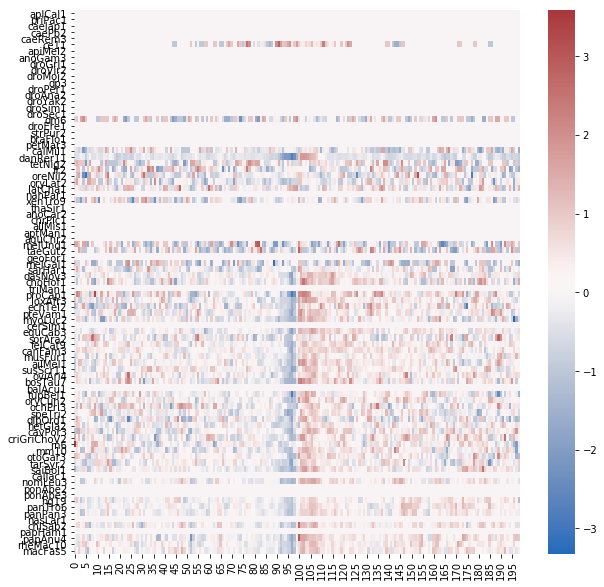

In [25]:
numbins = 199

rmspecies = ["vicPac2", "gadMor1","gorGor5","galGal6","wuhCor1","eboVir3","sacCer3",
            "macEug2","gadMor1","micMur2","manPen1","galGal6","ornAna2","ci2"]
species_list = [item for item in species_list if item not in rmspecies]

import seaborn as sns

for motifset in [("A","T"),("AC","GT"),("AG","CT"),("ATTC","AATG")]:
    matrix1 = np.zeros((len(species_list), numbins)) # motif 1
    matrix2 = np.zeros((len(species_list), numbins)) # motif 2
    matrix3 = np.zeros((len(species_list), numbins))
    matrices = [matrix1, matrix2, matrix3]
    
    for species in species_list:
        spind = species_list.index(species)
        try:
            data = pd.read_csv("%s.acc.strwindows.bed"%species, sep="\t")
            data = data[data["bin"]<=4900]
        except:
            continue
        
        motifind = 0
        for motif in motifset:            
            matrices[motifind][spind,:] = np.log10(data[motif]+1)-np.log10(np.mean(data[motif]))
            motifind += 1
        matrices[motifind][spind,:] = np.log2((data[motifset[0]]+1)/(data[motifset[1]]+1))
        
    fig = plt.figure()
    fig.set_size_inches((10, 10))
    ax = fig.add_subplot(111)
    sns.heatmap(matrices[2][:,:], ax=ax, cmap="vlag", yticklabels=species_list)